In [1]:
import xarray as xr
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## TRACER SMPS
smpspath = '/global/homes/h/hass877/houaossmpsM1.b1'
lst = glob.glob(os.path.join(smpspath, 'houaossmpsM1.b1*.nc'))
lst.sort()
obsdata = xr.open_mfdataset(lst, concat_dim='time',combine='nested')
#
time = obsdata['time'].data
smps = obsdata['dN_dlogDp'].load()
qc_smps = obsdata['qc_total_N_conc'].load()
size = obsdata['diameter_mobility'].load()
bounds = obsdata['diameter_mobility_bounds'].load().data
#
dmin = bounds[0,:,0]
dmax = bounds[0,:,1]
dlogDp = np.log10(dmax/dmin)
smps = qc_mask_qcflag(smps,qc_smps)
smps = smps*np.tile(dlogDp,[len(time),1])
#
dt=3600
time_new = pd.date_range(start='2021-10-01', end='2022-09-30', freq=str(int(dt))+"s")  # TRACER time period
smps_new = median_time_2d(time, smps, time_new)
#
idx100 = dmin[:]>=100
smps100_new = np.nansum(smps_new[:,idx100], 1)
smps100_new[smps100_new==0] = np.nan
#
ds = xr.Dataset({
                'smps_all': (['time', 'size'], smps_new),
                'smps100': (['time'], smps100_new),      
                'dlogDp': (['size'], np.float32(dlogDp)),   
                },
                  coords={'time': ('time', time_new), 'size': ('size', size.data)})
#
smps_all = ds.smps_all / dlogDp
pdf_smps_hiscale = np.nanmean(smps_all,axis=0)
##Plot 
fig,ax = mean_size([ds.size], [pdf_smps_hiscale], legend = ['TRACER'],color=['k'], marker=['o'], linestyles=['--'],
            xlimit=(5, 8e2), ylimit=(1e1,3e3), xlabel='Diameter (nm)', ylabel='dN/dlogDp (cm$^{-3}$)', 
            title = 'Mean Aerosol Size Distribution')

<xarray.Dataset>
Dimensions:                                     (time: 110761, bound: 2,
                                                 diameter_mobility: 192)
Coordinates:
  * time                                        (time) datetime64[ns] 2021-09...
  * diameter_mobility                           (diameter_mobility) float32 1...
Dimensions without coordinates: bound
Data variables: (12/50)
    base_time                                   (time) datetime64[ns] 2021-09...
    time_offset                                 (time) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
    time_bounds                                 (time, bound) datetime64[ns] dask.array<chunksize=(2, 2), meta=np.ndarray>
    diameter_mobility_bounds                    (time, diameter_mobility, bound) float32 dask.array<chunksize=(2, 192, 2), meta=np.ndarray>
    lower_size                                  (time) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    dN_dlogDp                                   (time, diameter_mobility) float32 dask.array<chunksize=(2, 192), meta=np.ndarray>
    ...                                          ...
    DMA_inner_radius                            (time) float32 0.937 ... 0.937
    DMA_outer_radius                            (time) float32 1.961 ... 1.961
    DMA_characteristic_length                   (time) float32 44.37 ... 44.37
    lat                                         (time) float32 29.67 ... 29.67
    lon                                         (time) float32 -95.06 ... -95.06
    alt                                         (time) float32 8.0 8.0 ... 8.0
Attributes: (12/29)
    command_line:                 aossmpscorr -s hou -f M1 -DR
    Conventions:                  ARM-1.2
    process_version:              ingest-aossmpscorr-1.2-0.el7
    dod_version:                  aossmps-b1-2.1
    site_id:                      hou
    platform_id:                  aossmps
    ...                           ...
    classifier_serial_number:     3082021907001
    channels_per_decade:          64
    instrument_output_units:      dw/dlogDp
    instrument_output_weighting:  Number
    doi:                          10.5439/1476898
    history:                      created by user dsmgr on machine adc-procno...

/tmp/ipykernel_1902895/3570616902.py:39: RuntimeWarning: All-NaN slice encountered
  data[tt,:] = np.nanmedian(data0[idx,:], axis = 0)
/global/homes/h/hass877/.conda/envs/work/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_1902895/3550054236.py:35: RuntimeWarning: Mean of empty slice
  pdf_smps_hiscale = np.nanmean(smps_all,axis=0)


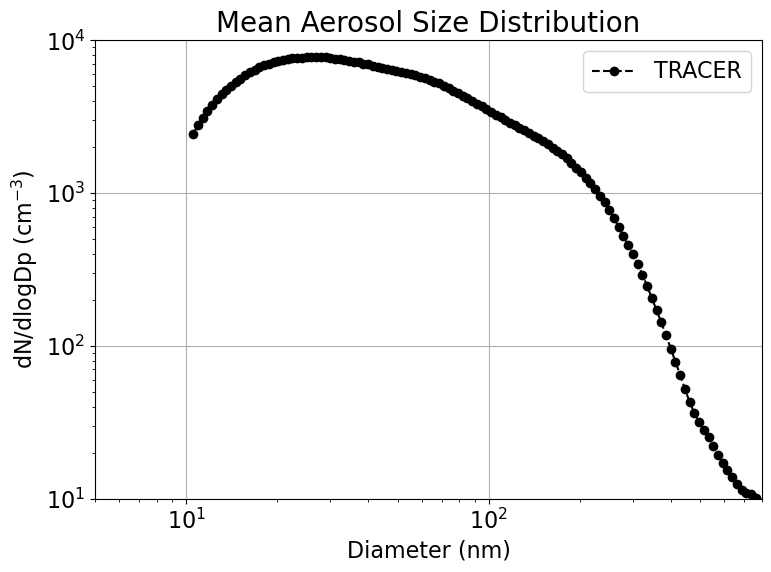

In [240]:
## TRACER SMPS MERGED
smpspath = '/global/homes/h/hass877/houmergedsmpsapsM1.c1'
lst = glob.glob(os.path.join(smpspath, 'houmergedsmpsapsM1.c1*.nc'))
lst.sort()
obsdata = xr.open_mfdataset(lst, concat_dim='time',combine='nested')
#
time = obsdata['time'].data
smps = obsdata['merged_dN_dlogDp'].load()
qc_smps = obsdata['qc_merged_total_N_conc'].load()
size = obsdata['merged_diameter_mobility'].load()
bounds = obsdata['merged_diameter_mobility_bounds'].load().data
#
dmin = bounds[0,:,0]
dmax = bounds[0,:,1]
dlogDp = np.log10(dmax/dmin)
smps = qc_mask_qcflag(smps,qc_smps)
smps = smps*np.tile(dlogDp,[len(time),1])
#
dt=3600
time_new = pd.date_range(start='2021-10-01', end='2022-09-30', freq=str(int(dt))+"s")  # TRACER time period
smps_new = median_time_2d(time, smps, time_new)
#
idx100 = dmin[:]>=100
smps100_new = np.nansum(smps_new[:,idx100], 1)
smps100_new[smps100_new==0] = np.nan
#
ds = xr.Dataset({
                'smps_all': (['time', 'size'], smps_new),
                'smps100': (['time'], smps100_new),      
                'dlogDp': (['size'], np.float32(dlogDp)),   
                },
                  coords={'time': ('time', time_new), 'size': ('size', size.data)})
#
smps_all = ds.smps_all / dlogDp
pdf_smps_hiscale = np.nanmean(smps_all,axis=0)
##Plot 
fig,ax = mean_size([ds.size], [pdf_smps_hiscale], legend = ['TRACER'],color=['k'], marker=['o'], linestyles=['--'],
            xlimit=(5, 8e2), ylimit=(1e1,1e4), xlabel='Diameter (nm)', ylabel='dN/dlogDp (cm$^{-3}$)', 
            title = 'Mean Aerosol Size Distribution')

/global/homes/h/hass877/.conda/envs/work/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_1902895/3570616902.py:39: RuntimeWarning: All-NaN slice encountered
  data[tt,:] = np.nanmedian(data0[idx,:], axis = 0)


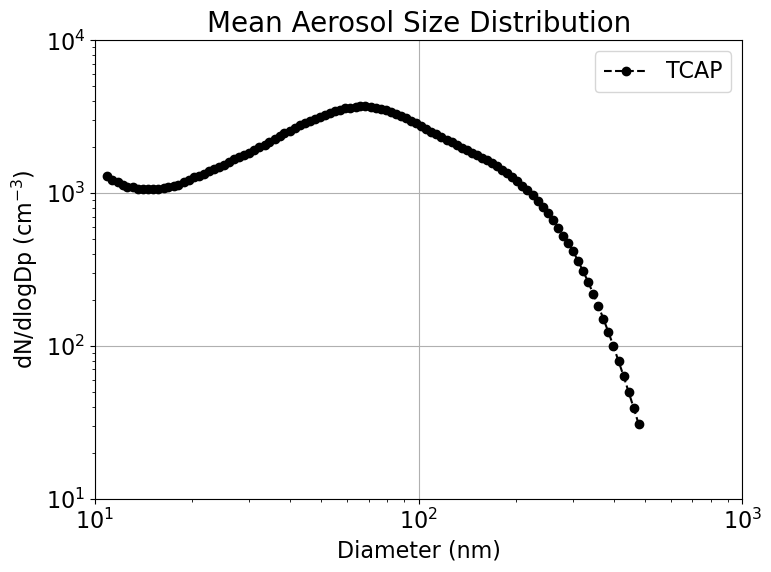

In [239]:
## TCAP SMPS
smpspath = '/global/homes/h/hass877/pvcaossmpsS1.b1'
lst = glob.glob(os.path.join(smpspath, 'pvcaossmpsS1.b1*.nc'))
lst.sort()
obsdata = xr.open_mfdataset(lst, concat_dim='time',combine='nested')
#
time = obsdata['time'].data
smps = obsdata['dN_dlogDp'].load()
qc_smps = obsdata['qc_total_N_conc'].load()
size = obsdata['diameter_mobility'].load()
bounds = obsdata['diameter_mobility_bounds'].load().data
#
dmin = bounds[0,:,0]
dmax = bounds[0,:,1]
dlogDp = np.log10(dmax/dmin)
smps = qc_mask_qcflag(smps,qc_smps)
smps = smps*np.tile(dlogDp,[len(time),1])
#
dt=3600*24
time_new = pd.date_range(start='2012-07-01', end='2013-03-10', freq=str(int(dt))+"s")  # TCAP time period
smps_new = median_time_2d(time, smps, time_new)
#
idx100 = dmin[:]>=100
smps100_new = np.nansum(smps_new[:,idx100], 1)
smps100_new[smps100_new==0] = np.nan
#
ds = xr.Dataset({
                'smps_all': (['time', 'size'], smps_new),
                'smps100': (['time'], smps100_new),      
                'dlogDp': (['size'], np.float32(dlogDp)),   
                },
                  coords={'time': ('time', time_new), 'size': ('size', size.data)})
#
smps_all = ds.smps_all / dlogDp
pdf_smps_hiscale = np.nanmean(smps_all,axis=0)
bb=ds.smps_all[:98].mean('time')/ dlogDp
##Plot 
fig,ax = mean_size([ds.size], [bb], legend = ['TCAP'],color=['k'], marker=['o'], linestyles=['--'],
            xlimit=(10, 1e3), ylimit=(1e1,1e4), xlabel='Diameter (nm)', ylabel='dN/dlogDp (cm$^{-3}$)', 
            title = 'Mean Aerosol Size Distribution')

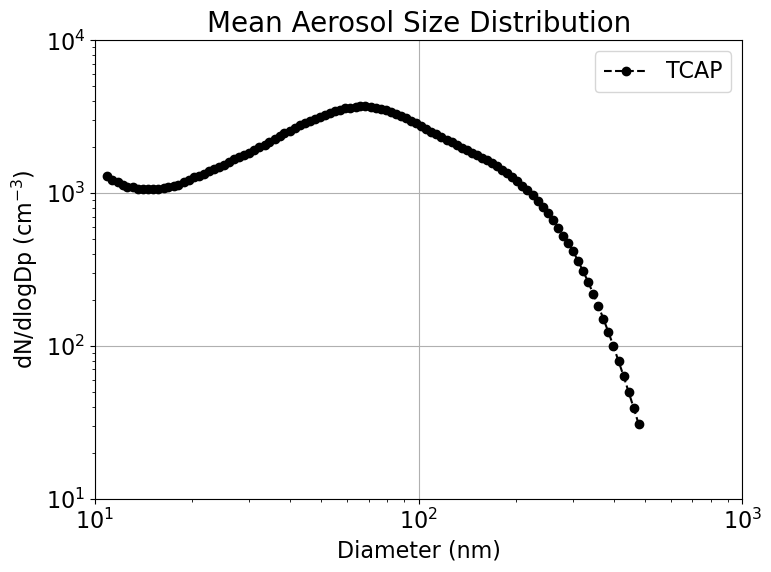

In [238]:
bb=ds.smps_all[:98].mean('time')/ dlogDp

fig,ax = mean_size([ds.size], [bb], legend = ['TCAP'],color=['k'], marker=['o'], linestyles=['--'],
            xlimit=(10, 1e3), ylimit=(1e1,1e4), xlabel='Diameter (nm)', ylabel='dN/dlogDp (cm$^{-3}$)', 
            title = 'Mean Aerosol Size Distribution')

In [155]:
bb=ds.smps_all[:250].mean('time')/ dlogDp
bb

<xarray.DataArray 'smps_all' (size: 106)>
array([70021.45319144, 60632.68806345, 52879.26226594, 46260.69645769,
       40622.82866032, 36544.31637809, 32381.60318301, 29230.00369866,
       26393.62052233, 24038.29356311, 21867.40237282, 19994.1736796 ,
       18327.32965913, 17028.01930306, 15704.78458886, 14696.33853737,
       13777.80846277, 12934.69612517, 12082.53605469, 11400.96198081,
       10788.02257771, 10245.66149099,  9681.17293676,  9245.29372193,
        8875.00826131,  8550.68900762,  8184.55132792,  7949.00999514,
        7647.56974416,  7458.81451652,  7271.62943808,  7073.0603232 ,
        6962.45026559,  6805.94424812,  6712.86194236,  6599.2518021 ,
        6533.22921148,  6415.9130589 ,  6393.64749898,  6307.61859694,
        6268.06679366,  6216.01579158,  6204.40124247,  6187.19070703,
        6172.21816208,  6139.84608406,  6116.70229777,  6084.01246031,
        6033.60936357,  5979.43485439,  5903.37503992,  5854.13052124,
        5685.278303  ,  5539.54008114,  5441.01625498,  5304.70953128,
        5156.06284725,  5005.3880125 ,  4873.12952237,  4714.78722506,
        4621.85236078,  4546.84161877,  4432.91275214,  4283.73836219,
        4135.40656716,  3986.61616444,  3854.9659685 ,  3774.85528147,
        3708.62159937,  3604.03422623,  3505.70050548,  3325.9930641 ,
        2976.58170674,  2751.93134301,  2641.31917329,  2588.5205489 ,
        2489.79015031,  2381.79881173,  2198.7258545 ,  1887.64732848,
        1648.10854722,  1523.71154159,  1404.29860998,  1278.90303093,
        1523.65408355,  1679.97199775,  1599.32274023,  1508.4908701 ,
        1416.59686693,  1345.80001573,  1256.15753652,  1193.25126111,
        2035.44874115,  2380.99523464,  2347.13062604,  2325.20422068,
        2289.59840442,  2271.48351708,  2265.64752731,  2263.76248294,
        2252.06221619,  2257.9965179 ,  2265.0128702 ,  2269.39191026,
        2284.55761684,  2312.79351635])
Coordinates:
  * size     (size) float32 10.9 11.3 11.8 12.2 12.6 ... 429.4 445.1 461.4 478.3

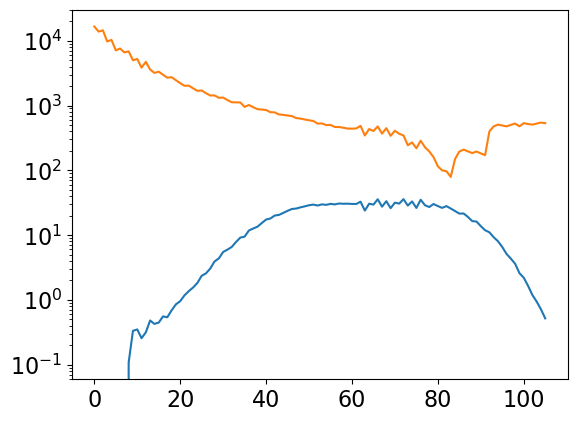

In [214]:
plt.plot(ds.smps_all[95])
plt.plot(ds.smps_all[244])
#np.where(ds.smps_all[98:242].notnull())
plt.yscale('log')

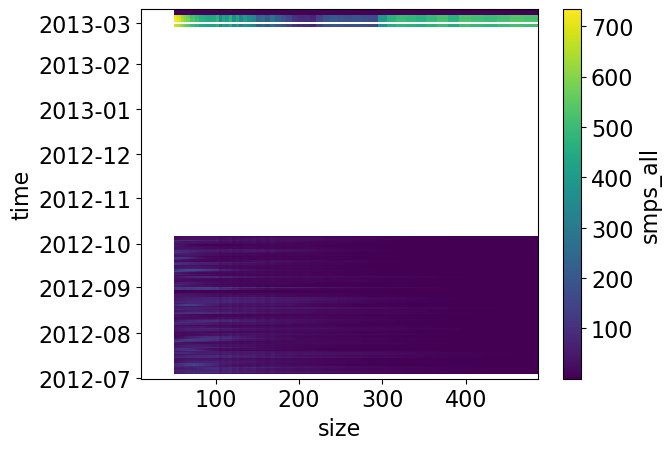

In [231]:
ds.smps_all.where(ds.size>50).plot()

In [228]:
ds.size

<xarray.DataArray 'size' (size: 106)>
array([ 10.9,  11.3,  11.8,  12.2,  12.6,  13.1,  13.6,  14.1,  14.6,  15.1,
        15.7,  16.3,  16.8,  17.5,  18.1,  18.8,  19.5,  20.2,  20.9,  21.7,
        22.5,  23.3,  24.1,  25. ,  25.9,  26.9,  27.9,  28.9,  30. ,  31.1,
        32.2,  33.4,  34.6,  35.9,  37.2,  38.5,  40. ,  41.4,  42.9,  44.5,
        46.1,  47.8,  49.6,  51.4,  53.3,  55.2,  57.3,  59.4,  61.5,  63.8,
        66.1,  68.5,  71. ,  73.7,  76.4,  79.1,  82. ,  85.1,  88.2,  91.4,
        94.7,  98.2, 101.8, 105.5, 109.4, 113.4, 117.6, 121.9, 126.3, 131. ,
       135.8, 140.7, 145.9, 151.2, 156.8, 162.5, 168.5, 174.7, 181.1, 187.7,
       194.6, 201.7, 209.1, 216.7, 224.7, 232.9, 241.4, 250.3, 259.5, 269. ,
       278.8, 289. , 299.6, 310.6, 322. , 333.8, 346. , 358.7, 371.8, 385.4,
       399.5, 414.2, 429.4, 445.1, 461.4, 478.3], dtype=float32)
Coordinates:
  * size     (size) float32 10.9 11.3 11.8 12.2 12.6 ... 429.4 445.1 461.4 478.3

In [34]:
dt=3600
time_new = pd.date_range(start='2021-10-01', end='2022-09-30', freq=str(int(dt))+"s")  # TRACER time period
smps_new = median_time_2d(time, smps, time_new)

/tmp/ipykernel_1902895/3570616902.py:39: RuntimeWarning: All-NaN slice encountered
  data[tt,:] = np.nanmedian(data0[idx,:], axis = 0)


In [35]:
idx100 = dmin[:]>=100
smps100_new = np.nansum(smps_new[:,idx100], 1)
smps100_new[smps100_new==0] = np.nan

In [36]:
ds = xr.Dataset({
                'smps_all': (['time', 'size'], smps_new),
                'smps100': (['time'], smps100_new),      
                'dlogDp': (['size'], np.float32(dlogDp)),   
                },
                  coords={'time': ('time', time_new), 'size': ('size', size.data)})
ds.size

<xarray.DataArray 'size' (size: 192)>
array([  1.02,   1.06,   1.09,   1.13,   1.18,   1.22,   1.26,   1.31,   1.36,
         1.41,   1.46,   1.51,   1.57,   1.63,   1.68,   1.75,   1.81,   1.88,
         1.95,   2.02,   2.09,   2.17,   2.25,   2.33,   2.41,   2.5 ,   2.59,
         2.69,   2.79,   2.89,   3.  ,   3.11,   3.22,   3.34,   3.46,   3.59,
         3.72,   3.85,   4.  ,   4.14,   4.29,   4.45,   4.61,   4.78,   4.96,
         5.14,   5.33,   5.52,   5.73,   5.94,   6.15,   6.38,   6.61,   6.85,
         7.1 ,   7.37,   7.64,   7.91,   8.2 ,   8.51,   8.82,   9.14,   9.47,
         9.82,  10.2 ,  10.6 ,  10.9 ,  11.3 ,  11.8 ,  12.2 ,  12.6 ,  13.1 ,
        13.6 ,  14.1 ,  14.6 ,  15.1 ,  15.7 ,  16.3 ,  16.8 ,  17.5 ,  18.1 ,
        18.8 ,  19.5 ,  20.2 ,  20.9 ,  21.7 ,  22.5 ,  23.3 ,  24.1 ,  25.  ,
        25.9 ,  26.9 ,  27.9 ,  28.9 ,  30.  ,  31.1 ,  32.2 ,  33.4 ,  34.6 ,
        35.9 ,  37.2 ,  38.5 ,  40.  ,  41.4 ,  42.9 ,  44.5 ,  46.1 ,  47.8 ,
        49.6 ,  51.4 ,  53.3 ,  55.2 ,  57.3 ,  59.4 ,  61.5 ,  63.8 ,  66.1 ,
        68.5 ,  71.  ,  73.7 ,  76.4 ,  79.1 ,  82.  ,  85.1 ,  88.2 ,  91.4 ,
        94.7 ,  98.2 , 101.8 , 105.5 , 109.4 , 113.4 , 117.6 , 121.9 , 126.3 ,
       131.  , 135.8 , 140.7 , 145.9 , 151.2 , 156.8 , 162.5 , 168.5 , 174.7 ,
       181.1 , 187.7 , 194.6 , 201.7 , 209.1 , 216.7 , 224.7 , 232.9 , 241.4 ,
       250.3 , 259.5 , 269.  , 278.8 , 289.  , 299.6 , 310.6 , 322.  , 333.8 ,
       346.  , 358.7 , 371.8 , 385.4 , 399.5 , 414.2 , 429.4 , 445.1 , 461.4 ,
       478.3 , 495.8 , 514.  , 532.8 , 552.3 , 572.5 , 593.5 , 615.3 , 637.8 ,
       661.2 , 685.4 , 710.5 , 736.5 , 763.5 , 791.5 , 820.5 , 850.5 , 881.7 ,
       914.  , 947.5 , 982.2 ], dtype=float32)
Coordinates:
  * size     (size) float32 1.02 1.06 1.09 1.13 1.18 ... 881.7 914.0 947.5 982.2

In [40]:
smps_all = ds.smps_all / dlogDp
pdf_smps_hiscale = np.nanmean(smps_all,axis=0)
pdf_smps_hiscale

/tmp/ipykernel_1902895/152337360.py:2: RuntimeWarning: Mean of empty slice
  pdf_smps_hiscale = np.nanmean(smps_all,axis=0)


array([          nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           

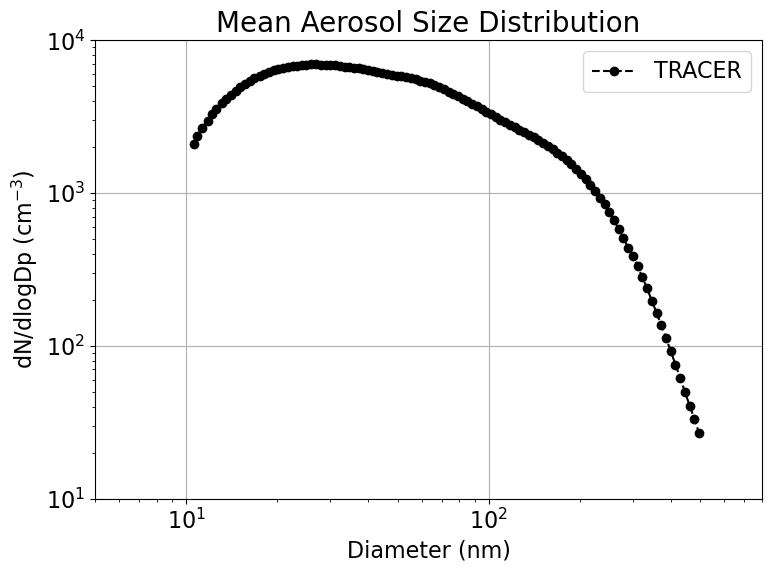

In [42]:
fig,ax = mean_size([ds.size], [pdf_smps_hiscale], legend = ['TRACER'],color=['k'], marker=['o'], linestyles=['--'],
            xlimit=(5, 8e2), ylimit=(1e1,1e4), xlabel='Diameter (nm)', ylabel='dN/dlogDp (cm$^{-3}$)', 
            title = 'Mean Aerosol Size Distribution')

In [2]:
smpspath = '/global/homes/h/hass877/maoaossmpsS1.a1'
lst = glob.glob(os.path.join(smpspath, 'maoaossmpsS1.a1*.cdf'))
lst.sort()
obsdata = xr.open_mfdataset(lst, concat_dim='time',combine='nested')
obsdata

<xarray.Dataset>
Dimensions:                   (diameter_midpoint: 108, time: 184175)
Coordinates:
  * diameter_midpoint         (diameter_midpoint) float32 10.6 10.9 ... 495.8
  * time                      (time) datetime64[ns] 2014-01-29T14:41:35 ... 2...
Data variables: (12/25)
    base_time                 (time) datetime64[ns] 2014-01-29 ... 2015-11-30
    time_offset               (time) datetime64[ns] dask.array<chunksize=(112,), meta=np.ndarray>
    sample_temperature        (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    sample_pressure           (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    mean_free_path            (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    gas_viscosity             (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    ...                        ...
    geometric_mean_std        (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    mode                      (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    total_concentration       (time) float32 dask.array<chunksize=(112,), meta=np.ndarray>
    lat                       (time) float32 -3.213 -3.213 ... -3.213 -3.213
    lon                       (time) float32 -60.6 -60.6 -60.6 ... -60.6 -60.6
    alt                       (time) float32 50.0 50.0 50.0 ... 50.0 50.0 50.0
Attributes: (12/20)
    command_line:        aos_ingest -s mao -f S1 -n aossmps -R -d
    process_version:     ingest-aos-12.6-0.el6
    dod_version:         aossmps-a1-2.2
    site_id:             mao
    facility_id:         S1: Manacapuru, Amazonia, Brazil
    data_level:          a1
    ...                  ...
    scans_per_sample:    1
    impactor_type:       0.071 cm
    density:             1.2 (g/cc)
    td:                  1.129 seconds
    tf:                  4.13645 seconds
    history:             created by user dsmgr on machine tin at 2014-02-21 0...

In [59]:
time_new

DatetimeIndex(['2014-01-29', '2014-02-28', '2014-03-30', '2014-04-29',
               '2014-05-29', '2014-06-28', '2014-07-28', '2014-08-27',
               '2014-09-26', '2014-10-26', '2014-11-25', '2014-12-25',
               '2015-01-24', '2015-02-23', '2015-03-25', '2015-04-24',
               '2015-05-24', '2015-06-23', '2015-07-23', '2015-08-22',
               '2015-09-21', '2015-10-21', '2015-11-20'],
              dtype='datetime64[ns]', freq='2592000S')

In [10]:
time = obsdata['time']
smps = obsdata['number_size_distribution'].load()
qc_smps = obsdata['status_flag'].load()
size = obsdata['diameter_midpoint'].load()

In [11]:
smps = qc_mask_qcflag(smps,qc_smps)
smps = qc_remove_neg(smps.values)
dt=3600
time = obsdata['time']
time_new = pd.date_range(start='2014-01-29', end='2014-12-31', freq=str(int(dt))+"s")  # HISCALE time period
smps_new = median_time_2d(time, smps, time_new)

/global/homes/h/hass877/.conda/envs/work/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_1917184/3570616902.py:39: RuntimeWarning: All-NaN slice encountered
  data[tt,:] = np.nanmedian(data0[idx,:], axis = 0)


In [12]:
dlogDp_smps = np.mean(np.log10(size[1:].data/size[0:-1].data))
smps_all = smps_new * dlogDp_smps
smps_all = smps_all/dlogDp_smps
pdf_smps_hiscale = np.nanmean(smps_all,axis=0)
pdf_smps_hiscale

array([1679.92076935, 1570.09444701,  860.35751952,  781.99241321,
        717.84017975,  670.02245959,  639.13788932,  605.40205822,
        587.45927295,  572.35603744,  564.42494174,  558.23444029,
        555.34585157,  553.92132313,  565.33489192,  573.96906475,
        589.75103437,  609.11790175,  625.24268294,  632.45066188,
        653.02762735,  679.87460594,  708.84407309,  732.58023985,
        768.9074072 ,  805.73059105,  852.02346189,  892.41253906,
        942.16305605,  983.6559921 , 1033.06375204, 1086.28387933,
       1138.6778248 , 1198.69169992, 1255.26117505, 1320.49457566,
       1381.39999053, 1450.34154817, 1513.45219681, 1603.27447154,
       1673.77153176, 1748.41184925, 1832.32037402, 1920.87467579,
       2004.86015098, 2087.33215664, 2170.88731167, 2245.43792385,
       2312.66922429, 2381.81424665, 2444.23051299, 2499.45552151,
       2562.93689607, 2545.53021891, 2549.08001895, 2570.53039443,
       2591.0742741 , 2601.19176005, 2615.51071707, 2634.03803

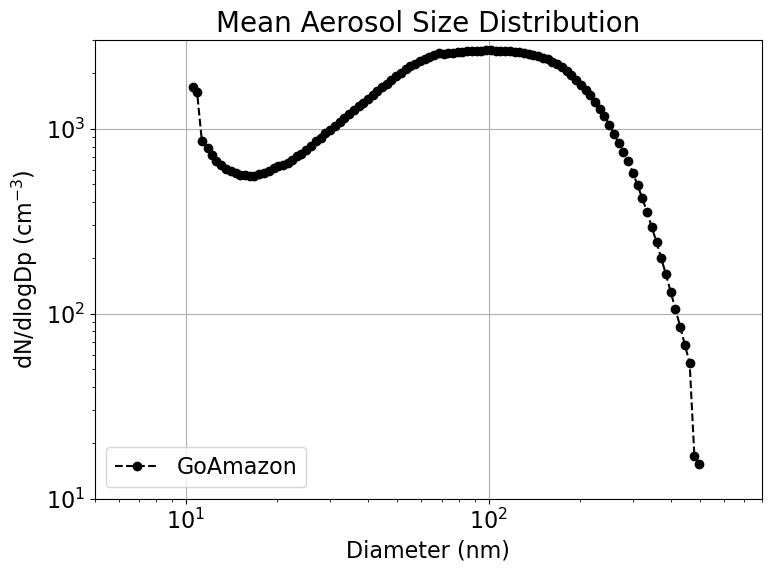

In [13]:
fig,ax = mean_size([size], [pdf_smps_hiscale], legend = ['GoAmazon'],color=['k'], marker=['o'], linestyles=['--'],
            xlimit=(5, 8e2), ylimit=(1e1,3e3), xlabel='Diameter (nm)', ylabel='dN/dlogDp (cm$^{-3}$)', 
            title = 'Mean Aerosol Size Distribution')

In [3]:
uhsaspath = '/pscratch/sd/h/hass877/ACT/sgpaosuhsas'
lst = glob.glob(os.path.join(uhsaspath, '*a1*.nc'))
lst.sort()
obsdata = xr.open_mfdataset(lst, combine='by_coords')

In [4]:
obsdata = xr.open_mfdataset(lst, combine='by_coords')
obsdata

<xarray.Dataset>
Dimensions:                   (time: 1206466, bin_num: 99)
Coordinates:
  * time                      (time) datetime64[ns] 2016-11-15T21:29:54.44000...
  * bin_num                   (bin_num) int32 0 1 2 3 4 5 ... 93 94 95 96 97 98
Data variables: (12/22)
    base_time                 (time) datetime64[ns] 2016-11-15 ... 2017-04-05
    time_offset               (time) datetime64[ns] dask.array<chunksize=(901,), meta=np.ndarray>
    sample_accumulation_time  (time) float32 dask.array<chunksize=(901,), meta=np.ndarray>
    scattering_voltage        (time) float32 dask.array<chunksize=(901,), meta=np.ndarray>
    current_sensor            (time) float32 dask.array<chunksize=(901,), meta=np.ndarray>
    sample_flow_rate          (time) float32 dask.array<chunksize=(901,), meta=np.ndarray>
    ...                        ...
    upper_size_limit          (time, bin_num) float32 dask.array<chunksize=(901, 99), meta=np.ndarray>
    size_distribution         (time, bin_num) float64 dask.array<chunksize=(901, 99), meta=np.ndarray>
    concentration             (time, bin_num) float32 dask.array<chunksize=(901, 99), meta=np.ndarray>
    lat                       (time) float32 36.61 36.61 36.61 ... 36.61 36.61
    lon                       (time) float32 -97.49 -97.49 ... -97.49 -97.49
    alt                       (time) float32 316.2 316.2 316.2 ... 316.2 316.2
Attributes: (12/19)
    command_line:            aosuhsas_ingest -s sgp -f E13 -RD --max-runtime 0
    Conventions:             ARM-1.2
    process_version:         ingest-aosuhsas-1.3-1.el7
    dod_version:             aosuhsas-a1-2.3
    site_id:                 sgp
    platform_id:             aosuhsas
    ...                      ...
    serial_number:           1509-048/WD81991
    sampling_interval:       10 seconds
    averaging_interval:      not averaged
    datastream:              sgpaosuhsasE13.a1
    doi:                     10.5439/1333828
    history:                 created by user erwinmj on machine agate at 2022...

In [26]:
time = obsdata['time']
dmin = obsdata['lower_size_limit'][0,:].load()
dmax = obsdata['upper_size_limit'][0,:].load()
raw_count = obsdata['size_distribution'].load()
flow_rate = obsdata['sample_flow_rate'].load()/60.

In [27]:
sample_time = 10    # sample interval is 10s
uhsas=np.full(raw_count.shape, np.nan)
for bb in range(uhsas.shape[1]):
    uhsas[:, bb] = raw_count[:, bb].data /flow_rate.data /sample_time
dataunit='1/cm3'

In [5]:
def qc_remove_neg(data, remove_zero='False'):
    """
    remove negative values
    options of keep or remove zero value
    """
    if remove_zero == 'False' or remove_zero == 'false':
        data[data<0]=np.nan
    elif remove_zero == 'True' or remove_zero == 'true':
        data[data<=0]=np.nan
    else:
        raise ValueError("remove_zero can only be true or false")
    return(data)

def median_time_2d(time0, data0, time):
    """
    rescale 2d data into coarser time resolution
    get median value in each coarser time window

    Parameters
    ----------
    time0 : numpy array
        time dimension for input data
    data0 : numpy array
        input data
    time : numpy array
        time dimension for output data

    Returns
    -------
    data : output data

    """
    if data0.shape[0] != len(time0):
        raise ValueError("the first dimension of input data must have the same size with time")
    data = np.full((len(time), data0.shape[1]), np.nan)
    dt = (time[1]-time[0])/2
    for tt in range(len(time)):
        idx = np.logical_and(time0 >= time[tt]-dt, time0 <= time[tt] + dt)
        data[tt,:] = np.nanmedian(data0[idx,:], axis = 0)
        # for dd in range(data0.shape[1]):
        #     if sum(~np.isnan(data0[idx,dd]))/sum(idx) > 0.4:
        #         data[tt,dd] = np.nanmedian(data0[idx,dd], axis = 0)
    return(data)

def median_time_1d(time0, data0, time):
    """
    rescale 1d data into coarser time resolution
    get median value in each coarser time window

    Parameters
    ----------
    time0 : numpy array
        time dimension for input data
    data0 : numpy array
        input data
    time : numpy array
        time dimension for output data

    Returns
    -------
    data : output data

    """
    if len(data0) != len(time0):
        raise ValueError("Arrays must have the same size")
    data = np.full((len(time)), np.nan)
    dt = (time[1]-time[0])/2
    for tt in range(len(time)):
        idx = np.logical_and(time0 >= time[tt]-dt, time0 <= time[tt] + dt)
        data[tt] = np.nanmedian(data0[idx], axis = 0)
    return(data)

#%% 
def qc_mask_qcflag(data,qc):
    """
    mask data with quality-control flags, typically remove all qc != 0

    Parameters
    ----------
    data : numpy array
        input data
    qc : numpy array, int format
        quality control flag data. remove when qc!=0

    Returns
    -------
    data : output data

    """
    if len(data.shape)==1:
        data[qc!=0]=np.nan
    elif len(data.shape)==2:
        data[qc!=0,:]=np.nan
    else: 
        raise ValueError("dimension of input data and flag data are inconsistent")
    return(data)

def mean_size(size, data, figsize=(8,6), xlimit=None, ylimit=None, xscale='log',yscale='log',
                 xlabel=None, ylabel=None, title=None, legend=None, linestyles=None,
                 marker=None, color=['k','b','g','c','r','orange','gray']):
    """
    plot mean particle size distribution

    Parameters
    ----------
    size : list of 1-d xarrays
        input of size coordinate
    data : list of 1-d xarrays
        input mean size distribution data
        other plotting parameters (marker, etc.) should also be list
    
    Returns
    -------
    fig : Figure
    ax : Axes

    """
    
    ndata = len(data)
    if marker is None:
        marker = [None for mm in range(ndata)]
    if linestyles is None:
        linestyles = ['-' for mm in range(ndata)]
    if legend is None:
        legend = [None for mm in range(ndata)]
    
    if xlimit is None and xscale=='log':
        xlimit = (np.min([np.min(x) for x in size]), np.max([np.max(x) for x in size]))
    if ylimit is None and yscale=='log':
        ylimit = [np.nanmin([np.min(y) for y in data]+[1e-2]), np.nanmax([np.max(y) for y in data]+[1e4])]
        ylimit[0] = np.max([ylimit[0], 1e-4])
        
    plt.rcParams.update({'font.size': 16})
    fig,ax = plt.subplots(figsize=figsize)
    for nn in range(ndata):
        ax.plot(size[nn],data[nn],marker=marker[nn],linestyle=linestyles[nn],color=color[nn],label=legend[nn])
    ax.legend()
    ax.set_ylim(ylimit)
    ax.set_xlim(xlimit)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.grid()
    ax.set_title(title, fontsize=20)
    plt.tight_layout()

    return(fig, ax)


In [8]:
size = (dmin+dmax)/2
idx100 = dmin>=100
uhsas100 = np.nansum(uhsas[:,idx100], 1)
uhsas100[uhsas100==0] = np.nan

In [9]:
dt=3600
time_new = pd.date_range(start='2016-11-15', end='2017-04-05', freq=str(int(dt))+"s")  # HISCALE time period
    
uhsas_new = median_time_2d(time, uhsas, time_new)
uhsas100_new = median_time_1d(time, uhsas100, time_new)

#%% output file
#outfile = predatapath + 'sfc_UHSAS_HISCALE.nc'
#print('output file '+outfile)
ds = xr.Dataset({
                'size_low': (['size'], dmin.data),
                'size_high': (['size'], dmax.data),
                'uhsas_all': (['time', 'size'], uhsas_new),
                'uhsas100': (['time'], uhsas100_new),
                },
                  coords={'time': ('time', time_new), 'size': ('size', size.data)})

/global/homes/h/hass877/.conda/envs/work/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [10]:
ds

<xarray.Dataset>
Dimensions:    (size: 99, time: 3385)
Coordinates:
  * time       (time) datetime64[ns] 2016-11-15 ... 2017-04-05
  * size       (size) float32 60.86 62.62 64.42 66.28 ... 931.5 958.4 986.0
Data variables:
    size_low   (size) float32 60.0 61.73 63.51 65.34 ... 892.5 918.3 944.8 972.0
    size_high  (size) float32 61.73 63.51 65.34 67.22 ... 944.8 972.0 1e+03
    uhsas_all  (time, size) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0
    uhsas100   (time) float64 nan nan nan nan nan ... 166.7 210.1 158.9 134.3

In [51]:
dmin = obsdata['lower_size_limit'][0,:].load()
dmax = obsdata['upper_size_limit'][0,:].load()
size = (dmin+dmax)/2

In [76]:
uhsas = obsdata['concentration'].load()
uhsas = qc_remove_neg(uhsas.values)
dt=3600*24
time = obsdata['time']
time_new = pd.date_range(start='2016-11-15', end='2016-12-31', freq=str(int(dt))+"s")  # HISCALE time period
uhsas_new = median_time_2d(time, uhsas, time_new)

/global/homes/h/hass877/.conda/envs/work/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/global/homes/h/hass877/.conda/envs/work/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [71]:
dlogDp = np.log10(dmax)-np.log10(dmin)
dlogDp_mean = np.mean(dlogDp)

In [72]:
uhsas_camp = uhsas_new/dlogDp_mean.values
pdf = np.nanmean(uhsas_camp,axis=0)

/tmp/ipykernel_1086132/1334224782.py:2: RuntimeWarning: Mean of empty slice
  pdf = np.nanmean(uhsas_camp,axis=0)


In [71]:
## HTDMA
smpspath = '/global/homes/h/hass877/pvcaoshtdmaS1.a1'
lst = glob.glob(os.path.join(smpspath, 'pvcaoshtdmaS1.a1*.cdf'))
lst.sort()
obsdata = xr.open_mfdataset(lst, concat_dim='time',combine='nested')
#
obsdata

<xarray.Dataset>
Dimensions:                    (time: 3765, bin: 60)
Coordinates:
  * time                       (time) datetime64[ns] 2013-01-27T17:12:23 ... ...
  * bin                        (bin) float32 0.0 1.0 2.0 3.0 ... 57.0 58.0 59.0
Data variables: (12/19)
    base_time                  (time) datetime64[ns] 2013-01-27T17:12:23 ... ...
    time_offset                (time) datetime64[ns] dask.array<chunksize=(93,), meta=np.ndarray>
    dry_diameter_setting       (time) float64 dask.array<chunksize=(93,), meta=np.ndarray>
    dry_rh_setting             (time) float32 dask.array<chunksize=(93,), meta=np.ndarray>
    humid_rh                   (time) float32 dask.array<chunksize=(93,), meta=np.ndarray>
    scan_min_diameter_setting  (time) float32 dask.array<chunksize=(93,), meta=np.ndarray>
    ...                         ...
    bin_center                 (time, bin) float32 dask.array<chunksize=(93, 60), meta=np.ndarray>
    bin_width                  (time, bin) float32 dask.array<chunksize=(93, 60), meta=np.ndarray>
    aerosol_concentration      (time, bin) float32 dask.array<chunksize=(93, 60), meta=np.ndarray>
    lat                        (time) float32 42.03 42.03 42.03 ... 42.03 42.03
    lon                        (time) float32 -70.05 -70.05 ... -70.05 -70.05
    alt                        (time) float32 43.0 43.0 43.0 ... 43.0 43.0 43.0
Attributes:
    command_line:            aoshtdma_ingest -s pvc -f S1 -d
    process_version:         ingest-aoshtdma-1.0-1.el5
    dod_version:             aoshtdma-a1-2.0
    site_id:                 pvc
    facility_id:             S1: Cape Cod, Massachusetts
    input_source:            /data/collection/pvc/pvcaoshtdmaS1.00/pvcmaosas1...
    sampling_interval:       
    averaging_interval:      
    resolution_description:  The resolution field attributes refer to the num...
    serial_number:           
    zeb_platform:            pvcaoshtdmaS1.a1
    history:                 created by user dsmgr on machine gold at 1-Apr-2...

In [72]:
uhsas = obsdata['aerosol_concentration'].load()
uhsas = qc_remove_neg(uhsas.values)
dt=3600
time = obsdata['time']
time_new = pd.date_range(start='2013-01-27', end='2013-03-08', freq=str(int(dt))+"s")  # HISCALE time period
uhsas_new = median_time_2d(time, uhsas, time_new)
uhsas_new

/global/homes/h/hass877/.conda/envs/work/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [ 58.86000061, 100.12999725,  71.68000031, ...,  55.61000061,
         80.58999634,  84.26000214],
       [ 63.22999954,  61.43999863,  60.56999969, ...,   0.89999998,
          1.26999998,   2.61999989],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [75]:
dmin = obsdata['scan_min_diameter_setting'].load()
dmax = obsdata['scan_max_diameter_setting'].load()
size = (dmin+dmax)/2
dlogDp = np.log10(dmax)-np.log10(dmin)
dlogDp_mean = np.mean(dlogDp)
dlogDp_mean

<xarray.DataArray ()>
array(1.3595563, dtype=float32)

In [76]:
uhsas_camp = uhsas_new/dlogDp_mean.values
pdf = np.nanmean(uhsas_camp,axis=0)
pdf

array([ 80.91936155,  61.8492886 ,  62.72170676,  63.42361129,
        65.50185773,  69.79972924,  74.31119421,  79.51399061,
        85.84132623,  90.15915023,  97.70260567, 105.56892696,
       113.21204686, 121.230039  , 129.74602576, 137.86757474,
       149.41699211, 163.073401  , 175.62903773, 188.45792806,
       200.5062916 , 211.33834863, 220.55972485, 227.69607339,
       231.15564754, 234.65936055, 237.17514831, 240.50806148,
       237.60797781, 235.00184958, 233.41813189, 231.8884304 ,
       231.99849872, 230.73547709, 232.75066632, 236.02898596,
       238.79435478, 236.99661608, 231.26959039, 224.31856622,
       214.38980065, 199.01397888, 185.62061945, 167.8860141 ,
       148.8634717 , 129.67494897, 111.03258191,  92.90624703,
        75.15465096,  58.73005283,  46.11687347,  36.49785891,
        30.15830782,  26.14059596,  23.06017588,  21.31740367,
        20.42093225,  18.58793084,  19.79973752,  26.47738499])

In [89]:
sizeT = obsdata['bin_center'].mean('time').values

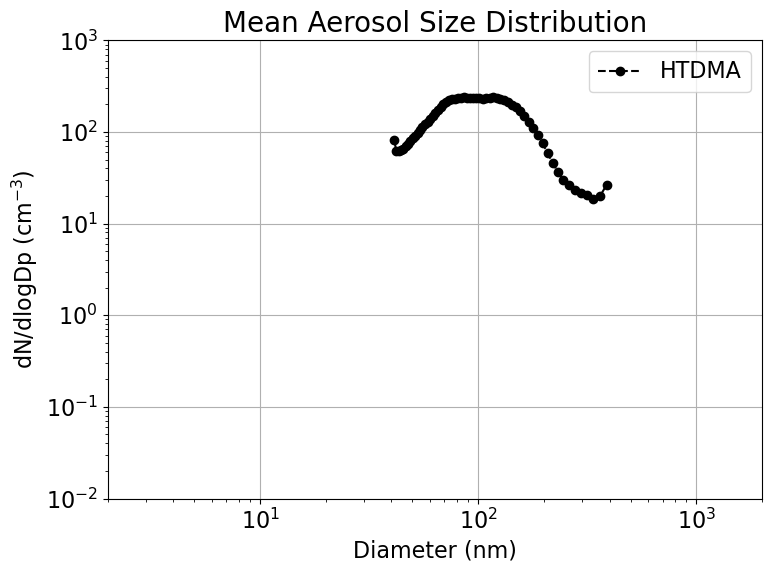

In [90]:
fig,ax = mean_size([sizeT], [pdf], legend = ['HTDMA'],color=['k'], marker=['o'], linestyles=['--'],
            xlimit=(2, 2e3), ylimit=(1e-2,1e3), xlabel='Diameter (nm)', ylabel='dN/dlogDp (cm$^{-3}$)', 
            title = 'Mean Aerosol Size Distribution')

In [2]:
from act.discovery.arm import download_arm_data

In [68]:
download_arm_data("taussan", "1fa1108c3215d1de", "pvcaoshtdmaS1.a1", "2013-01-27", "2013-03-08")

[DOWNLOADING] pvcaoshtdmaS1.a1.20130127.171223.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130128.000832.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130129.000259.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130130.000338.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130131.000418.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130201.000458.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130202.000538.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130203.000618.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130204.000657.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130205.000737.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130215.174736.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130216.000125.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130217.000545.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130218.000134.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130219.000454.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130220.000356.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130221.000347.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130222.000132.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.20130223.000117.cdf
[DOWNLOADING] pvcaoshtdmaS1.a1.

['/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130127.171223.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130128.000832.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130129.000259.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130130.000338.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130131.000418.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130201.000458.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130202.000538.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130203.000618.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130204.000657.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130205.000737.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130215.174736.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS1.a1.20130216.000125.cdf',
 '/global/u2/h/hass877/pvcaoshtdmaS1.a1/pvcaoshtdmaS